<a href="https://colab.research.google.com/github/empatdelapansembilan/-Danish-Fahmi-Anugrah-TugasMachineLearning/blob/main/Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets

In [ ]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Load Datasets

In [ ]:
iris = datasets.load_iris()

## Data Understanding

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pprint

In [ ]:
pprint.pprint(iris['DESCR'])

('.. _iris_dataset:\n'
 '\n'
 'Iris plants dataset\n'
 '--------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 150 (50 in each of three classes)\n'
 '    :Number of Attributes: 4 numeric, predictive attributes and the class\n'
 '    :Attribute Information:\n'
 '        - sepal length in cm\n'
 '        - sepal width in cm\n'
 '        - petal length in cm\n'
 '        - petal width in cm\n'
 '        - class:\n'
 '                - Iris-Setosa\n'
 '                - Iris-Versicolour\n'
 '                - Iris-Virginica\n'
 '                \n'
 '    :Summary Statistics:\n'
 '\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '                    Min  Max   Mean    SD   Class Correlation\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826\n'
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n'
 '    petal length:   1.0  6.9   3.76   1.76    

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Prepare Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.data[:, :2]
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Train Data

In [ ]:
svm_model = svm.SVC(kernel='rbf')

In [ ]:
svm_model.fit(X_train, y_train)

SVC()

## Evaluate Data

In [ ]:
svm_score = svm_model.score(X_test, y_test)

In [ ]:
print('Model accuracy:', svm_score)

Model accuracy: 0.8333333333333334


## Plot SVM Results

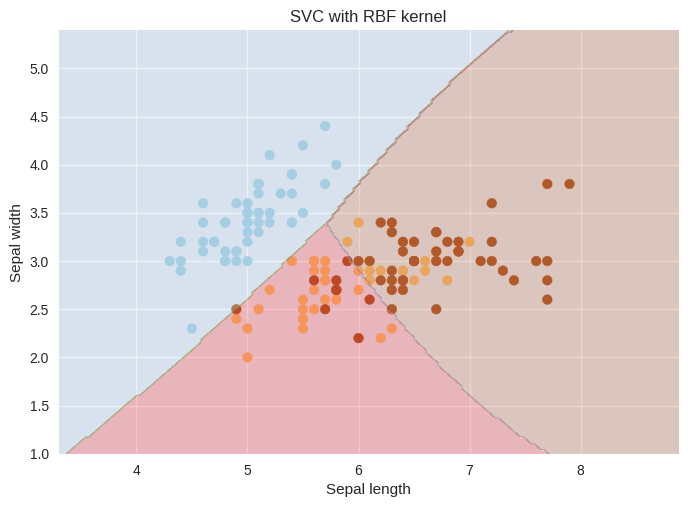

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.subplot(1, 1, 1)
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.25)

## Linear SVM

In [ ]:
svm_model2 = svm.SVC(kernel='rbf')

In [ ]:
svm_model2.fit(X_train, y_train)

SVC()

In [ ]:
svm_score = svm_model2.score(X_test, y_test)

In [ ]:
print('Model accuracy:', svm_score)

Model accuracy: 0.8333333333333334


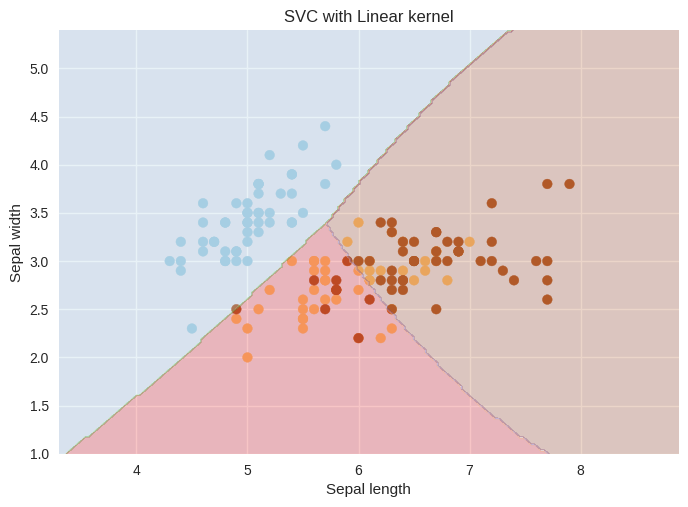

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')

plt.subplot(1, 1, 1)
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.25)